Install diagrams : pip install diagrams

Install graphviz : conda install python-graphviz

In [1]:
from diagrams import Diagram, Cluster

## 1. Create a sample network topology explaining the virtual network, associated VMSS and rules

In [2]:
from diagrams.azure.compute import VMScaleSet
from diagrams.azure.network import VirtualNetworks, Subnets, NetworkSecurityGroupsClassic, NetworkInterfaces, LoadBalancers, PublicIpAddresses
from diagrams.azure.identity import ManagedIdentities

In [3]:
with Diagram("Sample Network Topology",show=False, direction="LR", ) as topology:
    
    # Create a layout for first scaleset
    vnetOne = VirtualNetworks("VirtualNetworkOne")
    subnetsOne = Subnets("SubnetOne")     
    niOne = NetworkInterfaces("NICOne")
    vmssOne = VMScaleSet("VMScalesetOne")
    
    # Create a layout for second scaleset
    vnetTwo = VirtualNetworks("VirtualNetworkTwo")
    subnetsTwo = Subnets("SubnetTwo")     
    niTwo = NetworkInterfaces("NICTwo")
    vmssTwo = VMScaleSet("VMScalesetTwo")
    
    # Create a load balancer to manage the traffic.
    loadBalancers = LoadBalancers("LoadBalancer")
    
    # Create a public open IP Resource
    publicIPOne = PublicIpAddresses("PublicIPOne")
    publicIPTwo = PublicIpAddresses("PublicIPTwo")
    
    # Create network security groups to control the inbound and outbound rules into the machines.
    nsgOne = NetworkSecurityGroupsClassic("NSGOne")
    nsgTwo = NetworkSecurityGroupsClassic("NSGTwo")
    
    # Create Managed Identity for VMSS
    miOne = ManagedIdentities("MIOne")
    miTwo = ManagedIdentities("MITwo")
    
    # Create the flow
    vnetOne >> subnetsOne >> niOne >> vmssOne
    vnetTwo >> subnetsTwo >> niTwo >> vmssTwo
    
    # Associate NSG with subnets
    subnetsOne << nsgOne
    subnetsTwo << nsgTwo
    
    # Assign User Managed Identity with the VMSS
    vmssOne << miOne
    vmssTwo << miTwo
    
    # Associate public IP with the NIC
    niOne >> publicIPOne
    niTwo >> publicIPTwo
    
    # Associate scalesets with load balancers
    vmssOne >> loadBalancers
    vmssTwo >> loadBalancers
print('Topolopy Created successfully')

Topolopy Created successfully


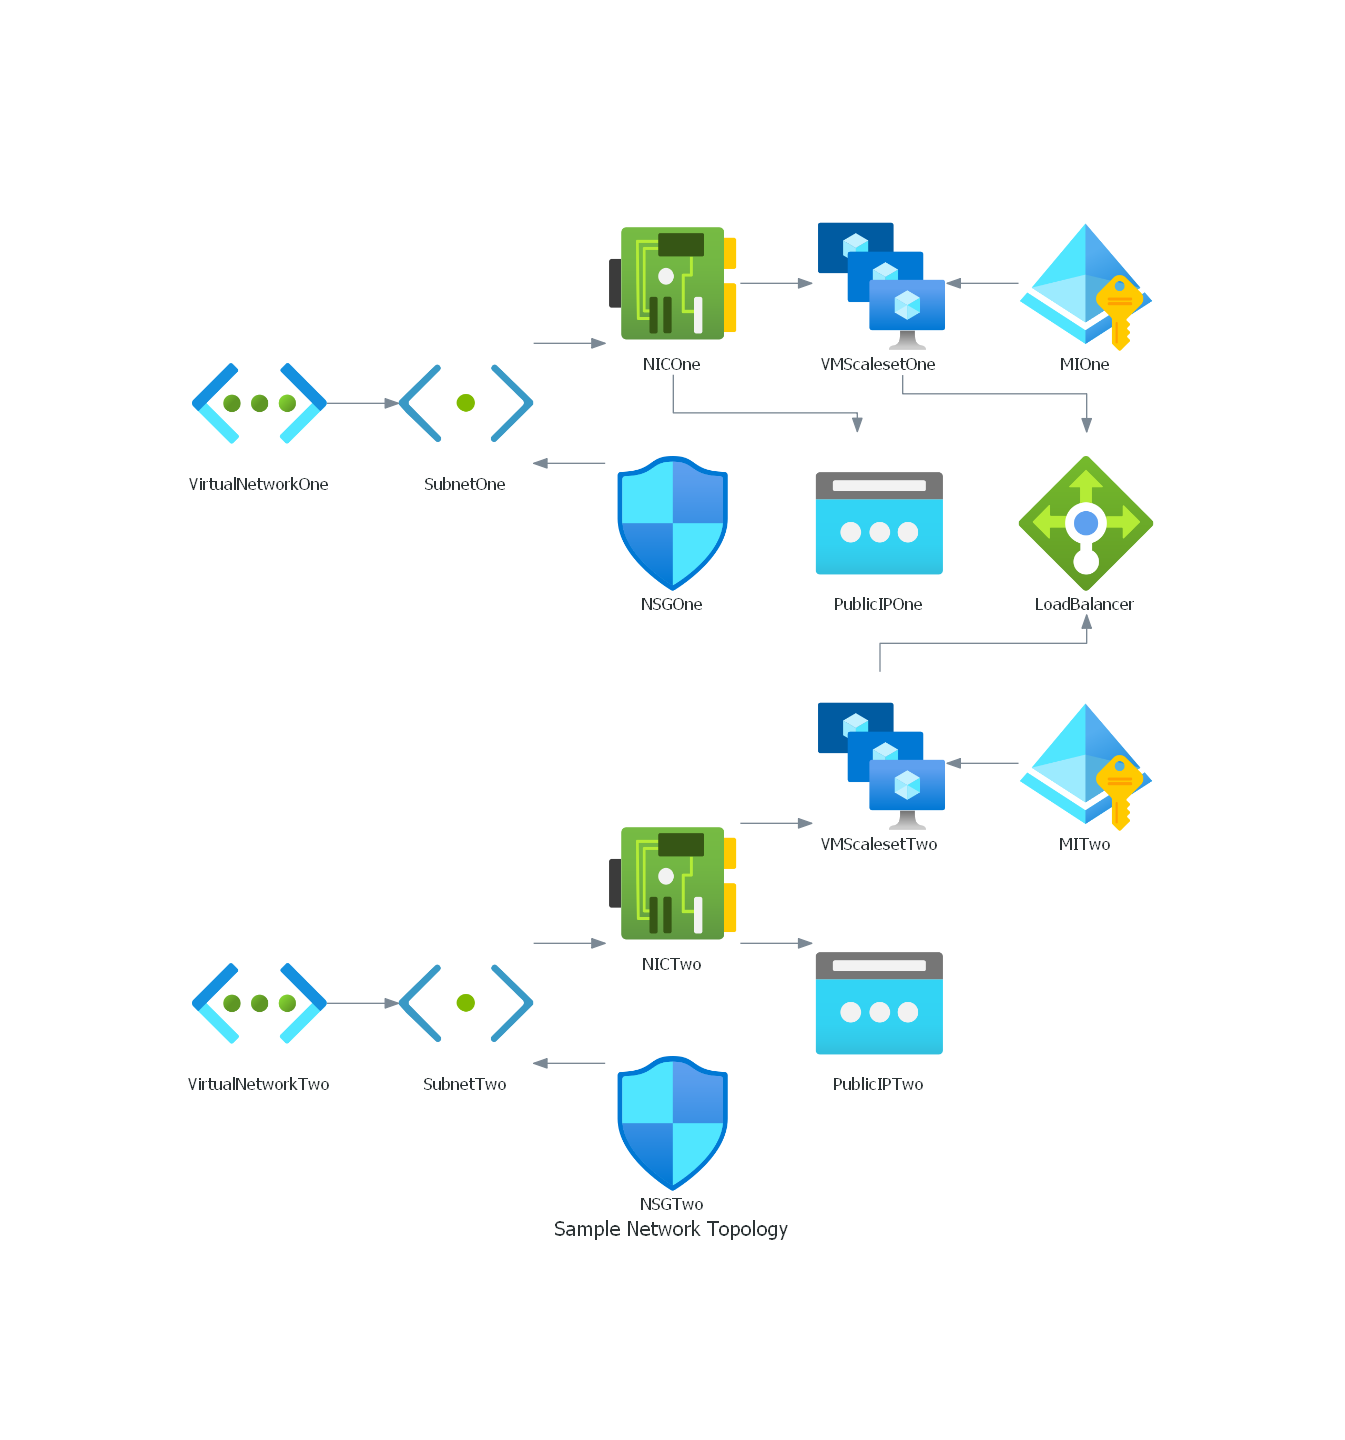

In [4]:
topology

## 2. Create a sample project layout where web app submits a request for processing the request to perform some operations in data lake or blob storage.

In [5]:
from diagrams.azure.compute import AppServices, VM
from diagrams.azure.integration import ServiceBus
from diagrams.azure.database import SQLServers
from diagrams.azure.storage import StorageAccounts, DataLakeStorage

Project layout Created successfully


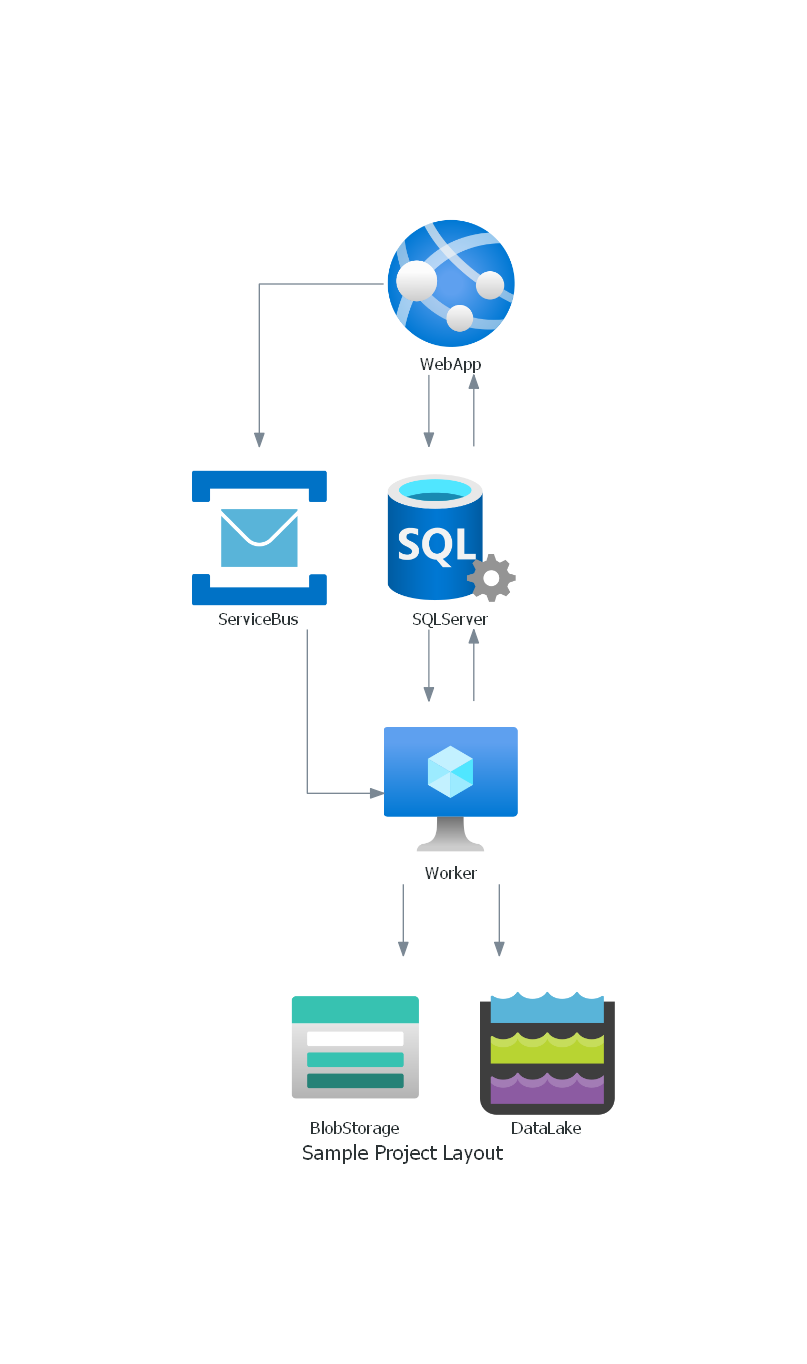

In [6]:
with Diagram("Sample Project Layout",show=False, direction="TB", ) as project:    
    webApp = AppServices("WebApp")
    serviceBus = ServiceBus("ServiceBus")
    sqlServer = SQLServers("SQLServer")
    worker = VM("Worker")
    storageAccount = StorageAccounts("BlobStorage")
    dataLake = DataLakeStorage("DataLake")
    
    webApp >> serviceBus
    webApp >> sqlServer
    webApp << sqlServer
    
    serviceBus >> worker
    sqlServer >> worker
    sqlServer << worker
    
    worker >> storageAccount
    worker >> dataLake
    
print('Project layout Created successfully')
project

## 3. Cluster the resources into a single group for better readability 

In [7]:
from diagrams import Cluster, Diagram
from diagrams.azure.integration import APIManagement
from diagrams.azure.compute import VMClassic, FunctionApps
from diagrams.azure.integration import ServiceBus
from diagrams.azure.storage import StorageAccounts
from diagrams.azure.analytics import LogAnalyticsWorkspaces

Cluster layout created successfully


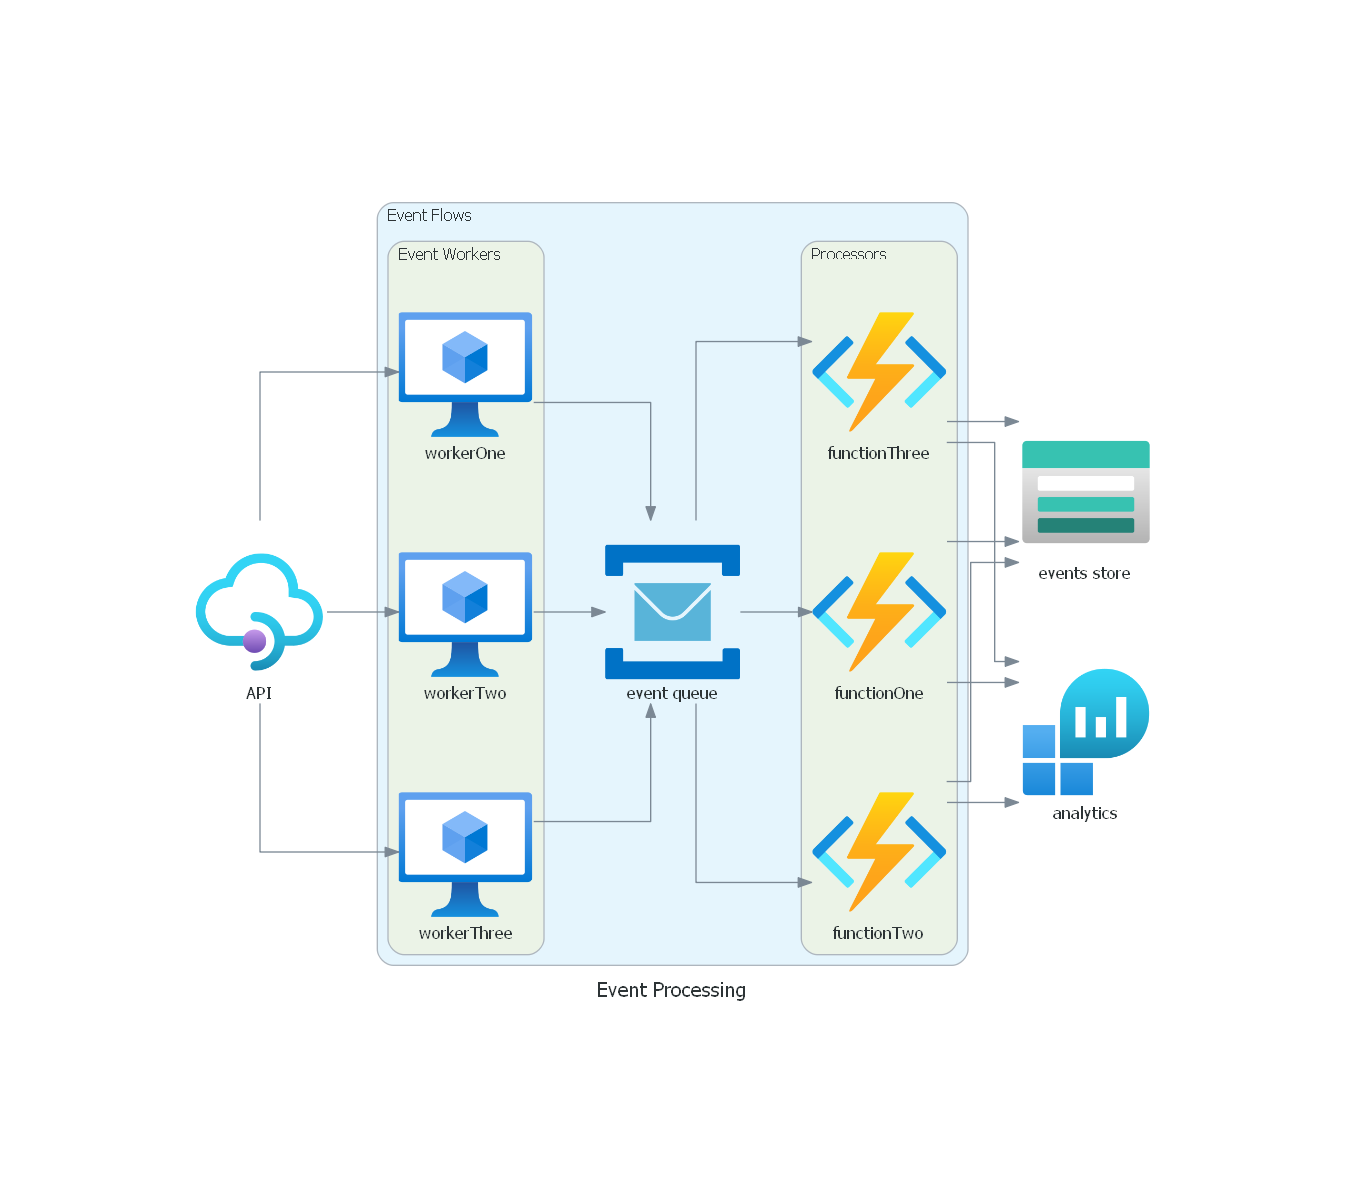

In [10]:
with Diagram("Event Processing", show=False) as eventProcessing:
    source = APIManagement("API")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [VMClassic("workerOne"),
                       VMClassic("workerTwo"),
                       VMClassic("workerThree")]

        queue = ServiceBus("event queue")

        with Cluster("Processors"):
            handlers = [FunctionApps("functionOne"),
                        FunctionApps("functionTwo"),
                        FunctionApps("functionThree")]

    store = StorageAccounts("events store")
    dw = LogAnalyticsWorkspaces("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw
print("Cluster layout created successfully")
eventProcessing